In [1]:
import networkx as nx

from fair_cc_functions import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def stats_complete(unfair_graph):
    stats = []
    nodes = len(unfair_graph.nodes)
    if nodes < 4: return -1
    fairlets = create_fairlets(unfair_graph)
    fair_graph = nx.Graph()
    fair_graph.add_nodes_from(fairlets)
    fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
    fair_graph.add_weighted_edges_from(fair_p)
    fair_graph.add_weighted_edges_from(fair_m)
    fair_cluster = cc_pivot(fair_graph)
    costs = cost(fair_cluster, unfair_graph)
    stats.append(costs)
    return stats

def stats_incomplete(unfair_graph, iteration=10):
    stats = []
    nodes = len(unfair_graph.nodes())
    if nodes < 4: return -1
    for j in range(iteration):
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations_incomplete(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        fair_cluster = cc_pivot(fair_graph)
        costs = cost(fair_cluster, unfair_graph)
        stats.append(costs)
    return stats

In [3]:
# stats for scenario 1
# always same costs as already optimal
res0 = []
for i in range(10, 61, 2):
    unfair_graph = generate_complete_graph(i)
    res0.append(stats_complete(unfair_graph))
nodes = [i for i in range(10, 61, 2)]
max_calc_cost = [i*i/4 for i in nodes]

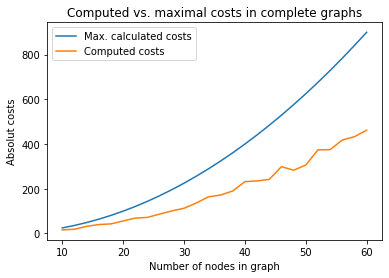

In [4]:
plt.plot(nodes, max_calc_cost, label='Max. calculated costs')
plt.plot(nodes, res0, label='Computed costs')
plt.ylabel('Absolut costs')
plt.xlabel('Number of nodes in graph')
plt.title('Computed vs. maximal costs in complete graphs')
plt.legend()
plt.savefig('../comp_vs_calc_cost_complete_graph.png')
plt.savefig('CompleteGraphsPlots/comp_vs_calc_cost_complete_graph.png')
plt.show()

In [5]:
# similar density of incomplete graphs
# probability for (+), resp. (-), is 0.5 in red and blue subgraphs => expected same density
rnd_rnd = []
for i in range(10, 61, 2):
    unfair_graph = generate_incomplete_graph(i)
    stat = stats_incomplete(unfair_graph, iteration=100)
    rnd_rnd.append(stat)

In [7]:
# red/blue subgraphs are both sparse (regarding (+) relations)
tree_tree, tree_star, star_star, cyc_cyc = [], [], [], []
cyc_star, cyc_tree = [],[]
for i in range(10, 61, 2):
    tree_tree_graph = generate_red_blue_graph(i, 'bal_bin_tree', 'bal_bin_tree')
    tree_star_graph = generate_red_blue_graph(i, 'bal_bin_tree', 'star')
    star_star_graph = generate_red_blue_graph(i, 'star', 'star')
    cyc_cyc_graph = generate_red_blue_graph(i, 'circle', 'circle')
    cyc_star_graph = generate_red_blue_graph(i, 'circle', 'star')
    cyc_tree_graph = generate_red_blue_graph(i, 'circle', 'bal_bin_tree')
    tree_tree.append(stats_incomplete(tree_tree_graph, iteration=100))
    tree_star.append(stats_incomplete(tree_star_graph, iteration=100))
    star_star.append(stats_incomplete(star_star_graph, iteration=100))
    cyc_cyc.append(stats_incomplete(cyc_cyc_graph, iteration=100))
    cyc_star.append(stats_incomplete(cyc_star_graph, iteration=100))
    cyc_tree.append(stats_incomplete(cyc_tree_graph, iteration=100))

In [8]:
# red/blue subgraphs are both dense (regarding (+) relations)
bipar_bipar =[]
bipar_3par = []
threepar_3par = []
for i in range(10, 61, 2):
    bipar_bipar_grap  = generate_red_blue_graph(i, 'bipartite', 'bipartite')
    bipar_bipar.append(stats_incomplete(bipar_bipar_grap, iteration=100))
    bipar_3par_graph = generate_red_blue_graph(i, 'bipartite', '3partite')
    bipar_3par.append(stats_incomplete(bipar_3par_graph, iteration=100))
    threepar_3par_graph = generate_red_blue_graph(i, '3partite', '3partite')
    threepar_3par.append(stats_incomplete(threepar_3par_graph, iteration=100))
    # clique_clique_graph = generate_red_blue_graph(i, 'clique', 'clique')
    # clique_clique.append(stats_incomplete(clique_clique_graph, iteration=50))
    # bipar_clique_graph = generate_red_blue_graph(i, 'clique', 'bipartite')
    # bipar_clique.append(stats_incomplete(bipar_clique_graph, iteration=50))

In [9]:
# red/blue subgraph are dense/sparse (regarding + relations)
tree_bipar, star_bipar, cyc_bipar = [], [], []
tree_3par, star_3par, cyc_3par = [],[],[]
for i in range(10, 61, 2):
    tree_bipar_graph = generate_red_blue_graph(i, 'bal_bin_tree', 'bipartite')
    star_bipar_graph = generate_red_blue_graph(i, 'star', 'bipartite')
    cyc_bipar_graph = generate_red_blue_graph(i, 'circle', 'bipartite')

    tree_bipar.append(stats_incomplete(tree_bipar_graph, iteration=100))
    star_bipar.append(stats_incomplete(star_bipar_graph, iteration=100))
    cyc_bipar.append(stats_incomplete(cyc_bipar_graph, iteration=100))

    tree_3par_graph = generate_red_blue_graph(i, 'bal_bin_tree', '3partite')
    tree_3par.append(stats_incomplete(tree_3par_graph, iteration=100))

    star_3par_graph = generate_red_blue_graph(i, 'star', '3partite')
    star_3par.append(stats_incomplete(star_3par_graph, iteration=100))

    cyc_3par_graph = generate_red_blue_graph(i, 'circle', '3partite')
    cyc_3par.append(stats_incomplete(cyc_3par_graph, iteration=100))

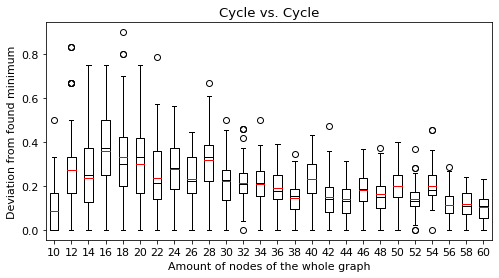

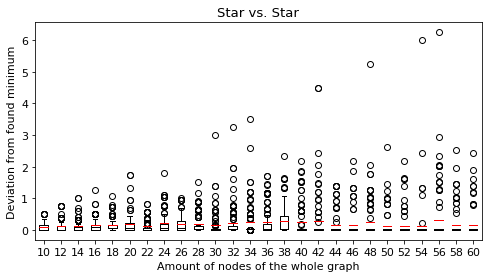

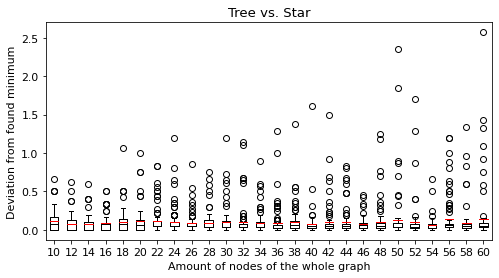

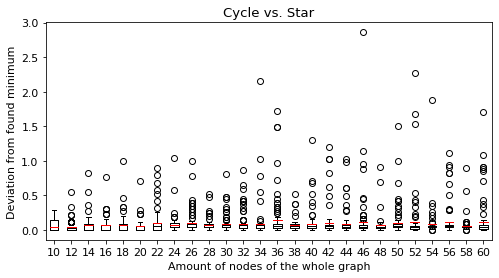

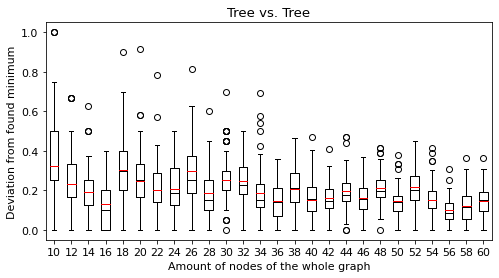

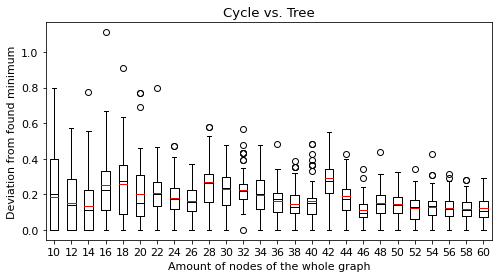

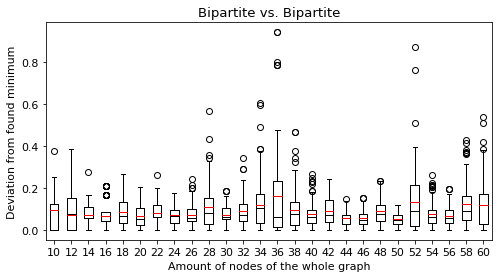

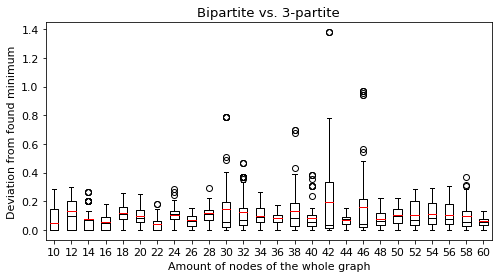

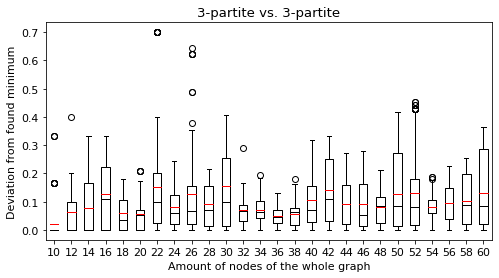

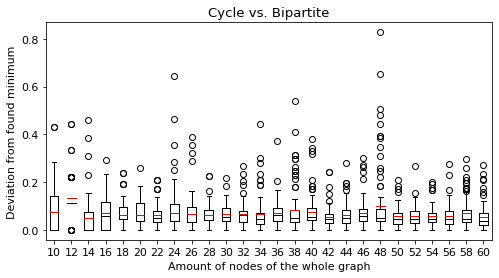

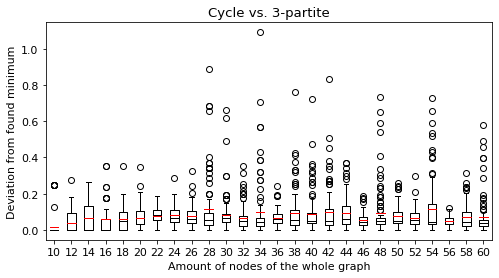

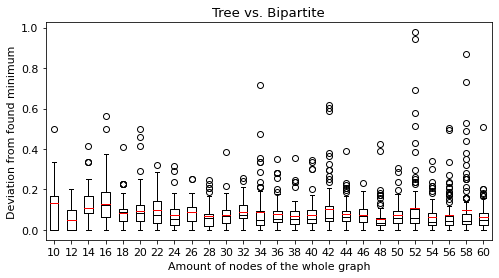

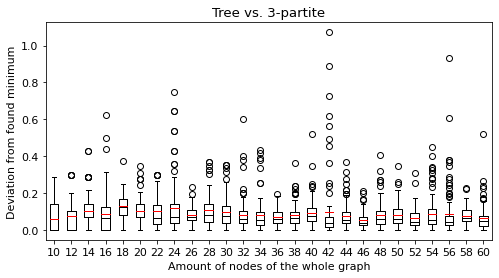

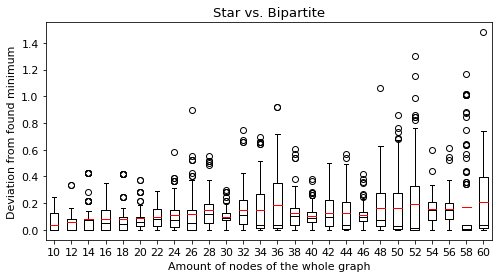

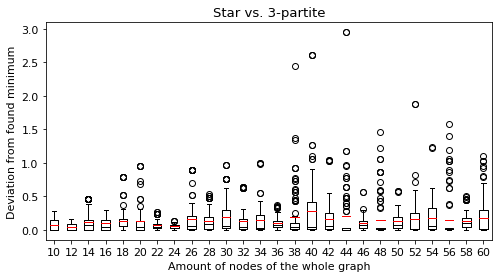

In [106]:
# random vs. random plot
plt.rc('font', size=11)
def draw_boxplot(to_plot,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):

    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([(i-j)/(k-j) for i,j,k in zip(to_plot, np.min(to_plot, axis=1), 3*np.min(to_plot, axis=1))], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    plt.savefig('IncompleteGraphsPlots/{}'.format(name))
    plt.show()

def draw_multi_boxplot(to_plot,
                       title='Title',
                       ylabel ='Deviation from found minimum',
                       xlabel='Amount of nodes of the whole graph',
                       name='boxplot'
                       ):
    plt.rc('font', size=18)
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    n_plots = len(to_plot)
    positions = [-0.3, 0, 0.3]
    colors=['black', 'blue', 'green']
    for i in range(n_plots):
        draw_plot(to_plot[i], ax, positions[i], colors[i], 'white', title, ylabel, xlabel)
    plt.xticks([i for i in range(len(nodes))], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()


# function to get multiple boxplots as one figure
def draw_plot(data, ax, offset, edge_color, fill_color, title, ylabel, xlabel):
    pos = np.arange(len(data))+offset
    bp = ax.boxplot([(i-j)/(k-j) for i,j,k in zip(data, np.min(data, axis=1), 3*np.min(data, axis=1))], positions= pos, widths=0.2, patch_artist=True,
                    showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'}, flierprops={'markeredgecolor':edge_color})
    for element in ['boxes', 'whiskers', 'fliers', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)


# draw_boxplot(rnd_rnd, 'Random vs. random', name='random_random.png')
draw_boxplot(cyc_cyc, 'Cycle vs. Cycle', name='cyc_cyc')
draw_boxplot(star_star, 'Star vs. Star', name='star_star')
draw_boxplot(tree_star, 'Tree vs. Star', name='tree_star')
draw_boxplot(cyc_star, 'Cycle vs. Star', name='cyc_star')
draw_boxplot(tree_tree, "Tree vs. Tree", name='tree_tree')
draw_boxplot(cyc_tree, "Cycle vs. Tree", name='cyc_tree')
draw_boxplot(bipar_bipar, 'Bipartite vs. Bipartite', name='bipar_bipar')
draw_boxplot(bipar_3par, 'Bipartite vs. 3-partite', name='bipar_3par')
draw_boxplot(threepar_3par, '3-partite vs. 3-partite', name='threepar_threepar')
draw_boxplot(cyc_bipar, "Cycle vs. Bipartite", name='cyc_bipar')
draw_boxplot(cyc_3par, "Cycle vs. 3-partite", name='cyc_3par')
draw_boxplot(tree_bipar, "Tree vs. Bipartite", name ='tree_bipar')
draw_boxplot(tree_3par, 'Tree vs. 3-partite', name='tree_3par')
draw_boxplot(star_bipar, 'Star vs. Bipartite', name='star_bipar')
draw_boxplot(star_3par, 'Star vs. 3-partite', name='star_3par')

# draw_boxplot(rnd_rnd, 'Random vs. random', name='random_random.png')
# draw_boxplot(tree_tree, 'Tree vs. tree', name='tree_tree.png')
# draw_boxplot(star_star, 'Star vs. star', name='star_star.png')
# draw_boxplot(tree_star, 'Tree vs. star', name='tree_star.png')
# draw_boxplot(cyc_cyc, 'Cycle vs. cycle', name='cyc_cyc.png')
# draw_boxplot(bipar_bipar, 'Bipartite vs. bipartite', name='bipar_bipar.png')
# # draw_boxplot(clique_clique, 'Clique vs. clique', name='clique_clique.png')
# # draw_boxplot(bipar_clique, 'Bipartite vs. clique', name='bipar_clique.png')
# draw_boxplot(tree_bipar, 'Tree vs. bipartite', name='tree_bipar.png')
# draw_boxplot(star_bipar, 'Star vs. bipartite', name='star_bipar.png')
# draw_boxplot(cyc_bipar, 'Cycle vs. bipartite', name='cyc_bipar.png')